<a href="https://colab.research.google.com/github/Franco-Urrutia-G/EIE401-1s-2024/blob/main/Actividades/Actividad%206/Actividad_6_UrrutiaFranco_18916762-8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 6</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Franco Urrutia Ghiardo</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones para extracción de características.

### 1.1 Con un audio (voz o música) no mayor a 30 segundos, utilizando la libreria Librosa (https://librosa.org/), numpy, pytorch, implementa operaciones fundamentales como:
- Media
- Kurtosis
- Skewness
- Zero Crossing Rate
- Spectral Centroid
- Energía
- RMSE
- Frecuencia fundamental
<p align="justify">
Estas operaciones son fundamentales en el proceso de extracción de características. Explica el resultado obtenido y que significa cada uno.

# Significado de las caracteristicas extraidas
1.   Media: Es el promedio de todos los valores de amplitud en la señal de audio. Indica el nivel medio de la señal.

2.  Kurtosis: Mide la "altura" y "anchura" de las distribuciones de los datos en comparación con una distribución normal. Una kurtosis alta puede indicar muchos valores extremos (picos).

3.  Skewness: Mide la asimetría de la distribución de los valores de amplitud. Un skewness positivo indica que la cola derecha es más larga o que hay más valores extremos a la derecha.

4.  Zero Crossing Rate: Es la tasa a la cual la señal cambia de signo. Es útil para determinar la tonalidad y el ruido en la señal. Una tasa alta puede indicar una señal ruidosa.

5.  Spectral Centroid: Indica el "centro de masa" del espectro de frecuencias de la señal y está relacionado con el brillo del sonido. Valores más altos indican sonidos más agudos.

6.  Energía: Es la suma de los cuadrados de las amplitudes de la señal, dividida por el número de muestras. Indica la potencia de la señal.

7.  RMSE (Root Mean Square Energy): Es la raíz cuadrada de la media de los cuadrados de las amplitudes. Proporciona una medida de la amplitud promedio de la señal.

8.  Frecuencia fundamental: Es la frecuencia más baja en la que una señal periódica repite. Es crucial para la percepción del tono. Una estimación precisa es esencial para aplicaciones como el reconocimiento de voz y la música.
Elemento de lista





# Librosa

In [ ]:
import librosa
import numpy as np
import scipy.stats

audio_path = '/content/PinkPanther30.wav'
y, sr = librosa.load(audio_path, duration=30)

# Media
mean = np.mean(y)

# Kurtosis
kurtosis = scipy.stats.kurtosis(y)

# Skewness
skewness = scipy.stats.skew(y)

# Zero Crossing Rate
zero_crossings = librosa.zero_crossings(y, pad=False)
zero_crossing_rate = sum(zero_crossings) / len(y)

# Spectral Centroid
spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

# Energía
energy = np.sum(y ** 2) / len(y)

# RMSE (Root Mean Square Energy)
rmse = np.mean(librosa.feature.rms(y=y))

# Frecuencia fundamental
f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0 = np.nanmean(f0)

print(f"Media: {mean}")
print(f"Kurtosis: {kurtosis}")
print(f"Skewness: {skewness}")
print(f"Zero Crossing Rate: {zero_crossing_rate}")
print(f"Spectral Centroid: {spectral_centroid}")
print(f"Energía: {energy}")
print(f"RMSE: {rmse}")
print(f"Frecuencia fundamental: {f0}")


Media: -0.0017006366979330778
Kurtosis: 2.6393305731082846
Skewness: 0.05846115120723752
Zero Crossing Rate: 0.09668329554043839
Spectral Centroid: 1594.3144553192362
Energía: 0.0013949378742382369
RMSE: 0.03259218856692314
Frecuencia fundamental: 317.3008756987837


# NumPy

In [ ]:
import numpy as np
import scipy.stats
import scipy.signal

y, sr = librosa.load(audio_path, duration=30)

# Media
mean = np.mean(y)

# Kurtosis
kurtosis = scipy.stats.kurtosis(y)

# Skewness
skewness = scipy.stats.skew(y)

# Zero Crossing Rate
zero_crossings = np.where(np.diff(np.sign(y)))[0]
zero_crossing_rate = len(zero_crossings) / len(y)

# Spectral Centroid
frequencies, power_spectrum = scipy.signal.periodogram(y, sr)
spectral_centroid = np.sum(frequencies * power_spectrum) / np.sum(power_spectrum)

# Energía
energy = np.sum(y ** 2) / len(y)

# RMSE
rmse = np.sqrt(np.mean(y ** 2))

# Frecuencia fundamental
autocorr = np.correlate(y, y, mode='full')
autocorr = autocorr[autocorr.size // 2:]
f0_index = np.argmax(autocorr[1:]) + 1
f0 = sr / f0_index

print(f"Media: {mean}")
print(f"Kurtosis: {kurtosis}")
print(f"Skewness: {skewness}")
print(f"Zero Crossing Rate: {zero_crossing_rate}")
print(f"Spectral Centroid: {spectral_centroid}")
print(f"Energía: {energy}")
print(f"RMSE: {rmse}")
print(f"Frecuencia fundamental: {f0}")


Media: -0.0017006366979330778
Kurtosis: 2.6393305731082846
Skewness: 0.05846115120723752
Zero Crossing Rate: 0.09707331821617536
Spectral Centroid: 825.1284895899573
Energía: 0.0013949378742382369
RMSE: 0.03734886646270752
Frecuencia fundamental: 22050.0


# Pytorch

In [ ]:
import torch
import torchaudio
import torchaudio.transforms as T
import scipy.stats

# Ruta del archivo de audio
audio_path = '/content/PinkPanther30.wav'

# Cargar el audio
waveform, sr = torchaudio.load(audio_path)
waveform = waveform.mean(dim=0)  # Si el audio es estéreo, convertir a mono

# Media
mean = torch.mean(waveform).item()

# Kurtosis
kurtosis = scipy.stats.kurtosis(waveform.numpy()).item()

# Skewness
skewness = scipy.stats.skew(waveform.numpy()).item()

# Zero Crossing Rate
zero_crossing_rate = torch.mean(torch.abs(torch.diff(torch.sign(waveform)))).item()

# Spectral Centroid
spectral_centroid_transform = T.SpectralCentroid(sample_rate=sr)
spectral_centroid = torch.mean(spectral_centroid_transform(waveform.unsqueeze(0))).item()

# Energía
energy = torch.sum(waveform ** 2).item() / waveform.numel()

# RMSE
rmse = torch.sqrt(torch.mean(waveform ** 2)).item()

# Frecuencia fundamental usando autocorrelación
def estimate_fundamental_frequency(waveform, sr):
    # Autocorrelación usando FFT
    N = len(waveform)
    waveform_fft = torch.fft.fft(waveform)
    ac = torch.fft.ifft(waveform_fft * torch.conj(waveform_fft)).real
    ac = ac[:N//2]  # Usar solo la primera mitad

    # Buscar el primer máximo
    f0_index = torch.argmax(ac[1:]) + 1
    f0 = sr / f0_index.item()
    return f0

f0 = estimate_fundamental_frequency(waveform, sr)

print(f"Media: {mean}")
print(f"Kurtosis: {kurtosis}")
print(f"Skewness: {skewness}")
print(f"Zero Crossing Rate: {zero_crossing_rate}")
print(f"Spectral Centroid: {spectral_centroid}")
print(f"Energía: {energy}")
print(f"RMSE: {rmse}")
print(f"Frecuencia fundamental: {f0}")


Media: -0.001700636581517756
Kurtosis: 2.6393305731082846
Skewness: 0.05846115120723752
Zero Crossing Rate: 0.19333665072917938
Spectral Centroid: nan
Energía: 0.001394937781970427
RMSE: 0.03734886646270752
Frecuencia fundamental: 22050.0


## 2. Implementaciones

### 2.1 Utilizando Pytorch Audio obtenga el espectrograma del audio original
El espectrograma debe producirse para valores número de muestras para la transformada rápida de fourier de  32, 128, 512.


## Librosa

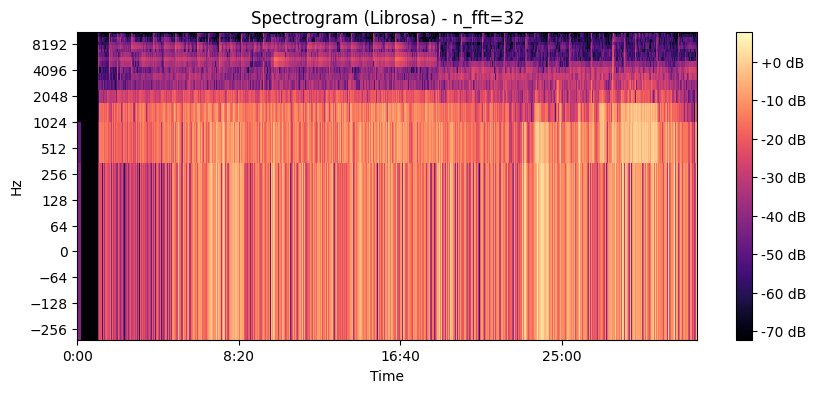

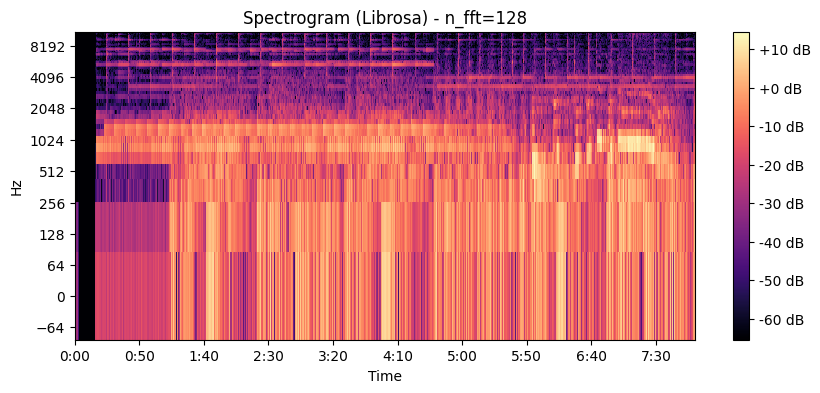

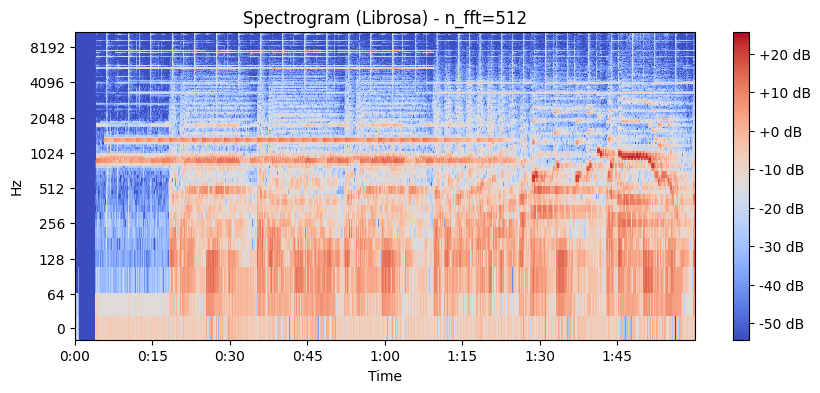

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_path = '/content/PinkPanther30.wav'
y, sr = librosa.load(audio_path, duration=30)

calcular y mostrar el espectrograma
def plot_spectrogram_librosa(y, sr, n_fft, title):
    S = librosa.stft(y, n_fft=n_fft)
    S_db = librosa.amplitude_to_db(abs(S))

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - n_fft={n_fft}')
    plt.show()

# Valores de n_fft
n_fft_values = [32, 128, 512]

# Generare spectrogramas
for n_fft in n_fft_values:
    plot_spectrogram_librosa(y, sr, n_fft, 'Spectrogram (Librosa)')


# Numpy

<ipython-input-19-90c2cacc6522>:13: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')


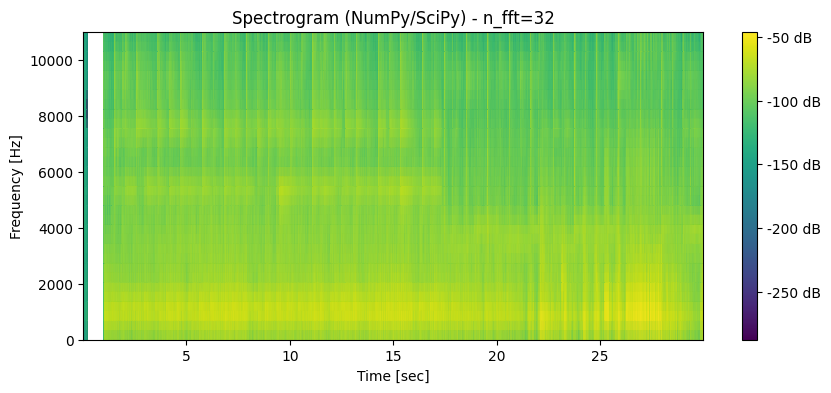

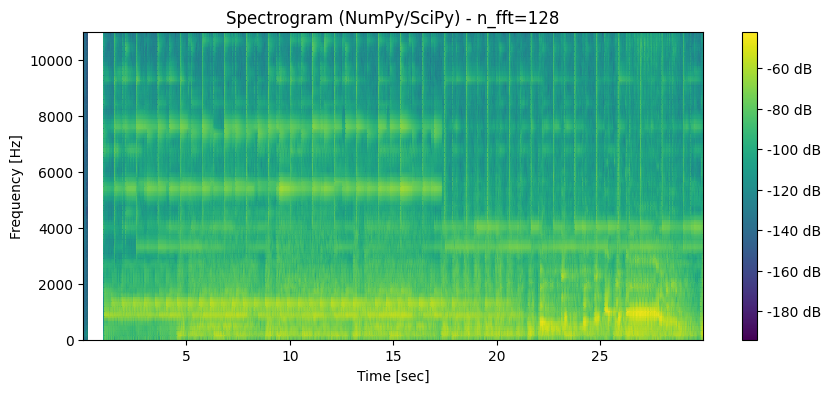

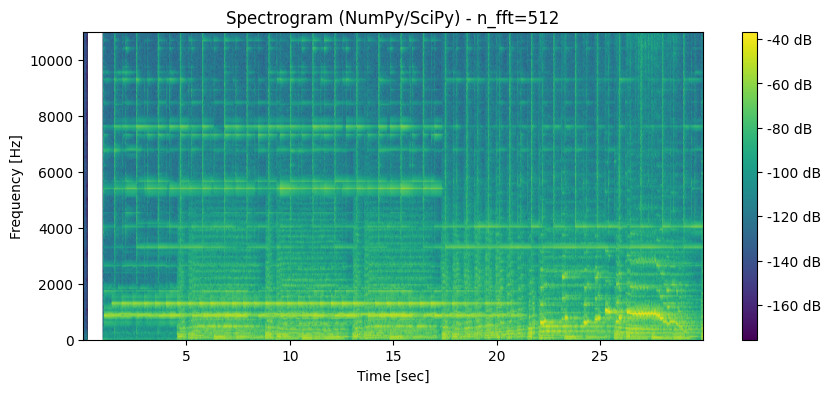

In [ ]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_path, duration=30)

# Calcular y mostrar el espectrograma
def plot_spectrogram_numpy(y, sr, n_fft, title):
    f, t, Sxx = scipy.signal.spectrogram(y, sr, nperseg=n_fft)

    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{title} - n_fft={n_fft}')
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    plt.show()

# Valores de n_fft
n_fft_values = [32, 128, 512]

# Generar espectrogramas
for n_fft in n_fft_values:
    plot_spectrogram_numpy(y, sr, n_fft, 'Spectrogram (NumPy/SciPy)')


# Pytorch

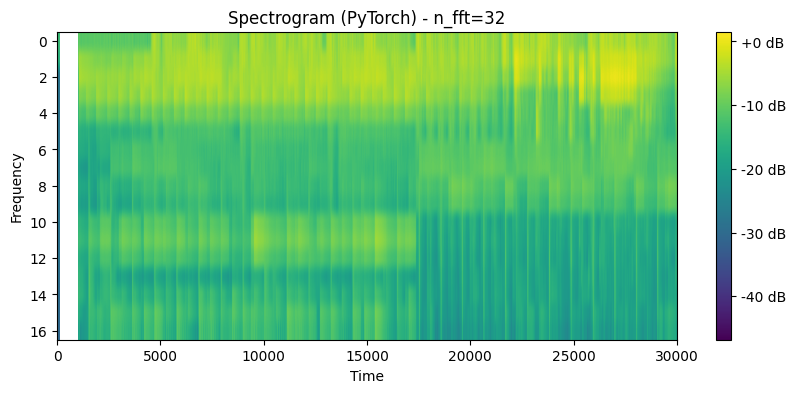

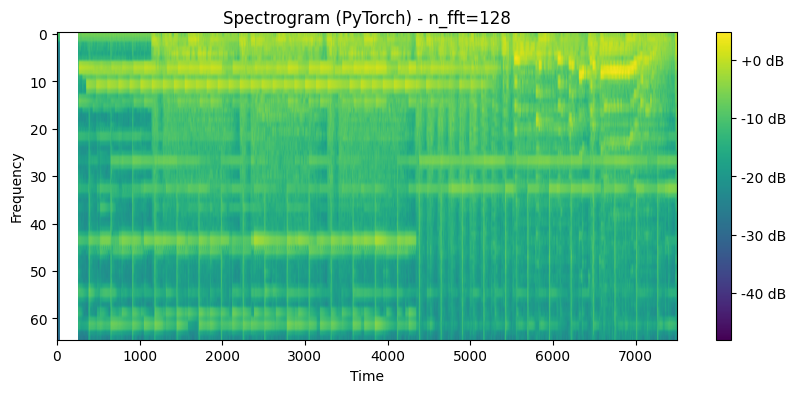

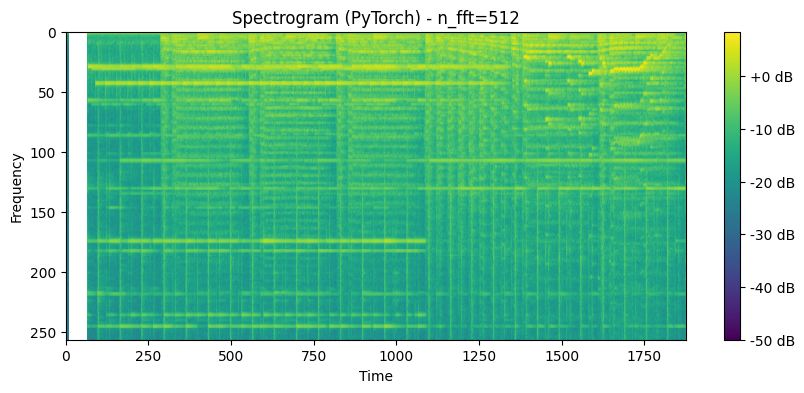

In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt

def load_audio(audio_path, sr=16000, mono=True):
    waveform, original_sr = torchaudio.load(audio_path)
    if mono:
        waveform = waveform.mean(dim=0, keepdim=True)  # Convertir a mono si es estéreo
    if original_sr != sr:
        transform = torchaudio.transforms.Resample(orig_freq=original_sr, new_freq=sr)
        waveform = transform(waveform)
    return waveform, sr

# calcular y mostrar el espectrograma
def plot_spectrogram_torch(waveform, sr, n_fft, title):
    spectrogram_transform = torchaudio.transforms.Spectrogram(n_fft=n_fft)
    spectrogram = spectrogram_transform(waveform)

    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.log2()[0, :, :].detach().numpy(), cmap='viridis', aspect='auto')
    plt.colorbar(format="%+2.0f dB")
    plt.title(f'{title} - n_fft={n_fft}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

audio_path = '/content/PinkPanther30.wav'

waveform, sr = load_audio(audio_path)

# Valores de n_fft
n_fft_values = [32, 128, 512]

# Generar espectrogramas
for n_fft in n_fft_values:
    plot_spectrogram_torch(waveform, sr, n_fft, 'Spectrogram (PyTorch)')


### 2.2 Utilizando Pytorch audio y Librosa, implementa Mel Frequency Cepstral Coefficients (MFCCs) (opcional)

Sigue el siguiente ejemplo (https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial) y explica que significa el resultado obtenido, graficando los coeficientes en un espectrograma. Investiga sobre Cepstral Analysis.


Dado que el código de esta pregunta es comparable en longitud a todo el resto de preguntas se envia en otro archivo.

# Pytorch

Librosa

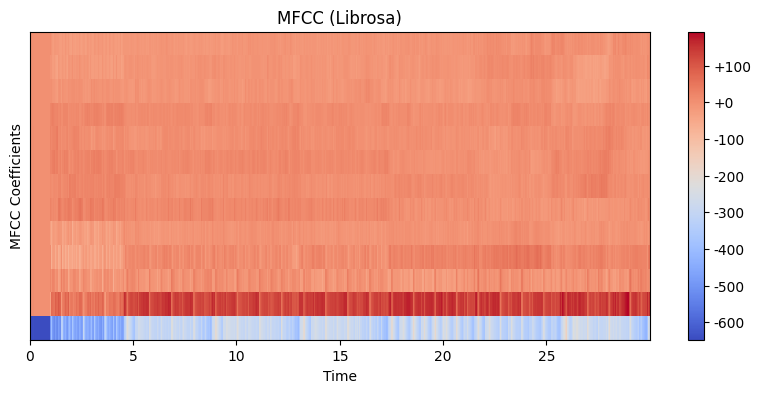

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Cargar el audio
audio_path = '/content/PinkPanther30.wav'
y, sr = librosa.load(audio_path, duration=30)

# Calcular los MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Mostrar los MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('MFCC (Librosa)')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.show()




# Explicación de los resultados y el análisis cepstral
### ¿Qué son los MFCCs?
Los MFCCs (Mel Frequency Cepstral Coefficients) son una representación de la envolvente del espectro de potencia de una señal de audio en una escala de frecuencia Mel. Este enfoque imita la percepción humana del sonido, siendo una técnica popular en el reconocimiento de voz y otras aplicaciones de procesamiento de audio.

## ¿Cómo se calculan?
Transformada de Fourier: Se convierte la señal de tiempo a frecuencia.
Escala de Mel: Las frecuencias se mapean a una escala de Mel para imitar la percepción auditiva humana.
Transformada de Coseno: Se aplica una transformada de coseno discreta para obtener los coeficientes cepstrales.
Análisis Cepstral
El análisis cepstral implica la conversión de una señal de tiempo en una representación que destaca la estructura de la frecuencia de frecuencia, conocida como "cepstrum". Esto se utiliza para detectar cambios en la tasa de cambios en el espectro de frecuencia, útil en el análisis de señales periódicas y la separación de fuente-filtro en señales de audio.

## Interpretación de los MFCCs
Los gráficos de los MFCCs muestran cómo las características espectrales de la señal de audio varían con el tiempo. Las coordenadas en el eje y representan los coeficientes cepstrales, y en el eje x, el tiempo. Las variaciones en los colores indican la intensidad de los coeficientes, proporcionando una representación compacta y eficiente de la envolvente espectral de la señal.

Los MFCCs son útiles para extraer características que son menos sensibles a las variaciones en la amplitud de la señal y más relacionadas con el contenido perceptual del sonido, como los formantes en el habla.


### 3. Audio Processing
### 3.1 En matlab, del paquete de procesamiento de audio, debes elegir una función de la librería, estudiarla y hacer un ejemplo.

Debes enviar un informe en PDF de 1 (una) página explicando, el algoritmo seleccionado, como funciona y el ejemplo que desarrollaste. Incluye por lo menos un gráfico que demuestre el trabajo realizado.

Debes subir a tu repositorio el código en matlab con dicha solución.

En el sitio  https://la.mathworks.com/help/audio/index.html?s_tid=CRUX_lftnav y https://la.mathworks.com/help/audio/audio-processing-algorithm-design.html, encuentras diferentes funciones para generar efectos como reverberancia o control de la onda (compresores, gates, etc)

Así mismo, en el sitio https://la.mathworks.com/help/signal/measurements-and-feature-extraction.html, encuentras ejemplos para extracción de caracteristicas de la señal de audio, por ejemplo métricas de pulso y de transición.


    

## 5. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[MFCC]https://medium.com/@derutycsl/intuitive-understanding-of-mfccs-836d36a1f779

[Cepstrum]https://www.kuniga.me/blog/2021/12/11/pitch-via-cepstrum.html

[LPC] https://www.youtube.com/watch?v=DIr6SPdK4NA

[LPC] https://www.kuniga.me/blog/2021/05/13/lpc-in-python.html

[MFCC] https://librosa.org/doc/0.10.1/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

[MFCC] https://pytorch.org/audio/main/generated/torchaudio.transforms.MFCC.html

[Extracción]https://www.researchgate.net/publication/281409882_Continuous_Bangla_Speech_Segmentation_using_Short-term_Speech_Features_Extraction_Approaches
